## Calculating financial returns in R

One of the most important tasks in financial markets is to analyze historical returns on various investments. To perform this analysis we need historical data for the assets. There are many data providers, some are free most are paid. In this chapter we will use the data from Yahoo’s finance website.

In this post we will:

- Download prices
- Calculate Returns
- Calculate mean and standard deviation of returns

Lets load the libraries first.

In [34]:
library(dplyr)
library(tidyr)
library(tidyquant)
library(timetk)
library(ggplot2)

We will get the price for first for Netflix price.

In [2]:
netflix <- tq_get("NFLX",                    
                  from = '2009-01-01',
                  to = "2018-03-01",
                  get = "stock.prices")

Next we will plot the adjusted price of Netflix.

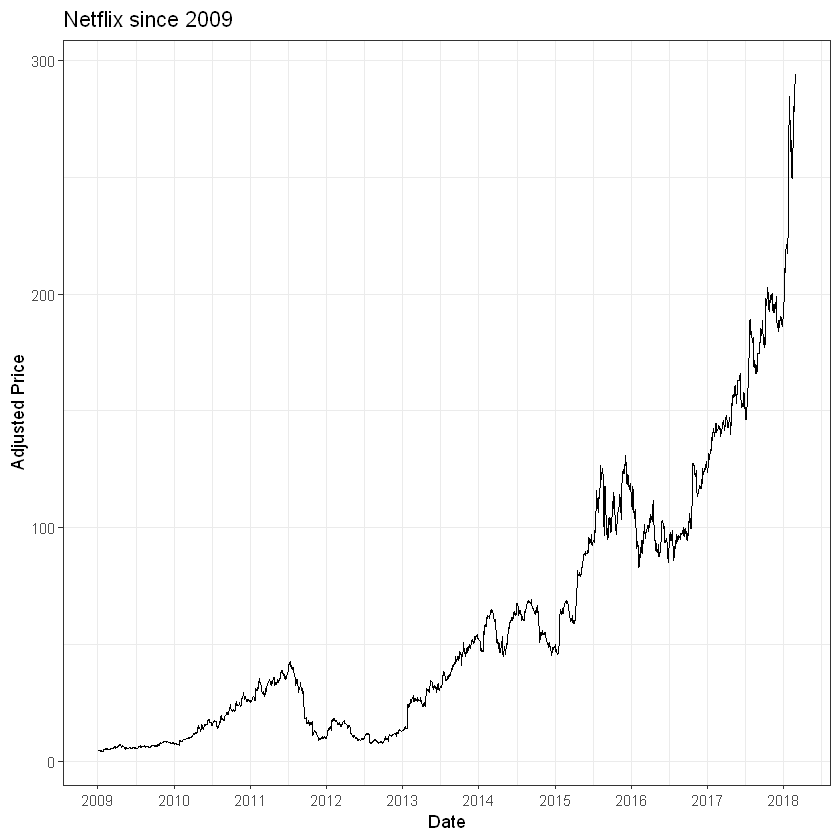

In [7]:
netflix %>%
  ggplot(aes(x = date, y = adjusted)) +
  geom_line() +
  ggtitle("Netflix since 2009") +
  labs(x = "Date", "Price") +
  scale_x_date(date_breaks = "years", date_labels = "%Y") +
  labs(x = "Date", y = "Adjusted Price") +
  theme_bw()

### Calculating the daily and monthly returns for individual stock

Once we downloaded the stock prices from yahoo finance, the next thing to do is to calculate the returns. We will again use tidyquant package to do the calculations. We have already download the price data for Netflix above, if you haven’t done that then see the above section.

In [8]:
# Calculate daily returns

netflix_daily_returns <- netflix %>%
  tq_transmute(select = adjusted,           # this specifies which column to select   
               mutate_fun = periodReturn,   # This specifies what to do with that column
               period = "daily",      # This argument calculates Daily returns
               col_rename = "nflx_returns") # renames the column

#Calculate monthly returns just change the argument "period"

netflix_monthly_returns <- netflix %>%
  tq_transmute(select = adjusted,
               mutate_fun = periodReturn,
               period = "monthly",      # This argument calculates Monthly returns
               col_rename = "nflx_returns")

### Charting the daily and monthly for Netflix

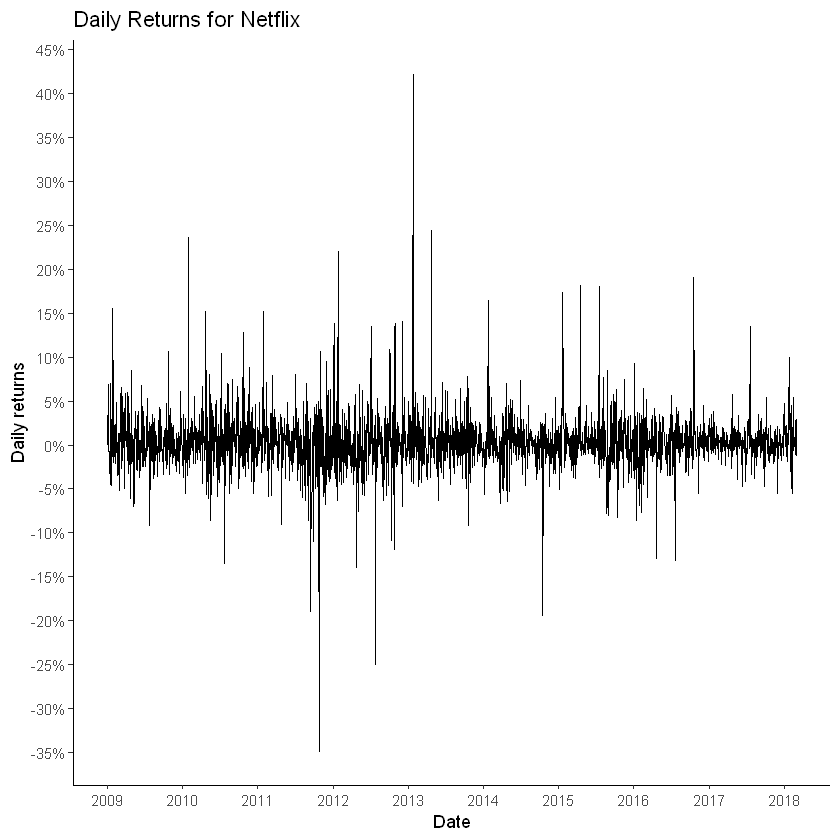

In [9]:
# We will use a line chart for daily returns

netflix_daily_returns %>%
  ggplot(aes(x = date, y = nflx_returns)) +
  geom_line() +
  theme_classic() +
  labs(x = "Date", y = "Daily returns") +
  ggtitle("Daily Returns for Netflix") +
  scale_x_date(date_breaks = "years", date_labels = "%Y") +
  scale_y_continuous(breaks = seq(-0.5,0.6,0.05),
                     labels = scales::percent) 

After looking at the daily returns chart for Netflix we can conclude that the returns are quite volatile and the stock can move +/- 5% on any given day. To get a sense of how extreme the returns can be we can plot a histogram.

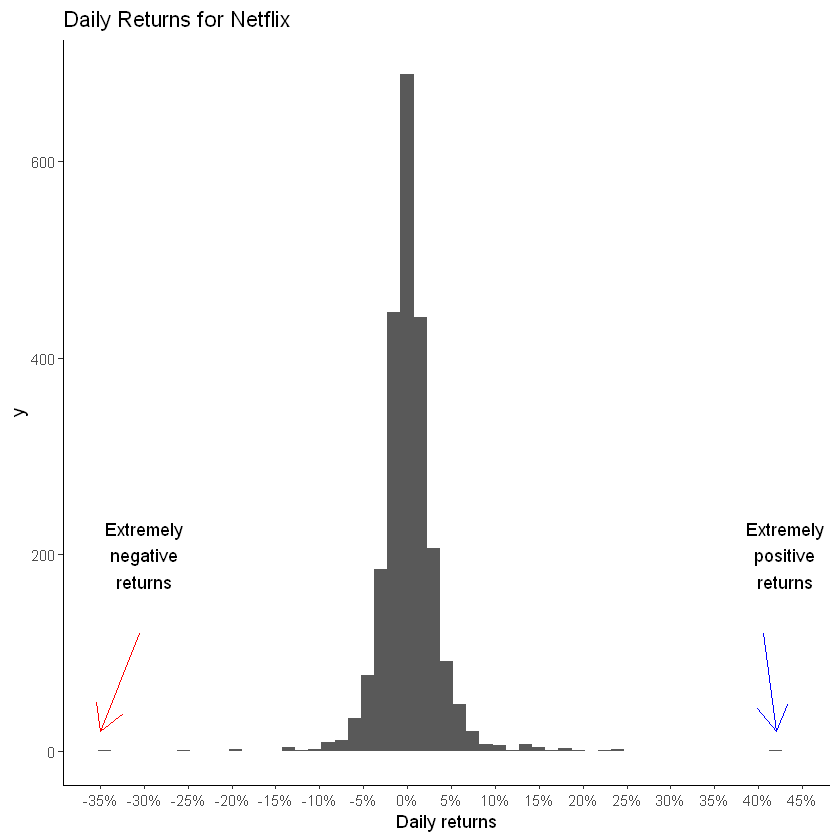

In [10]:
netflix_daily_returns %>%
  ggplot(aes(x = nflx_returns)) +
  geom_histogram(binwidth = 0.015) +
  theme_classic() +
  labs(x = "Daily returns") +
  ggtitle("Daily Returns for Netflix") +
  scale_x_continuous(breaks = seq(-0.5,0.6,0.05),
                     labels = scales::percent) +
  annotate(geom = 'text', x = -0.30, y= 200, label = "Extremely\nnegative\nreturns") +
  annotate(geom = 'segment', x = -0.305, xend = -0.35,  y = 120, yend = 20, color = 'red', arrow = arrow()) +
  annotate(geom = 'segment', x = 0.405, xend = 0.42,  y = 120, 
           yend = 20, color = 'blue', arrow = arrow(type = "open")) +
  annotate(geom = 'text', x = 0.430, y = 200, label = "Extremely\npositive\nreturns")

Next we can plot the monthly returns for Netflix since 2009. We will use the bar chart to plot the data.

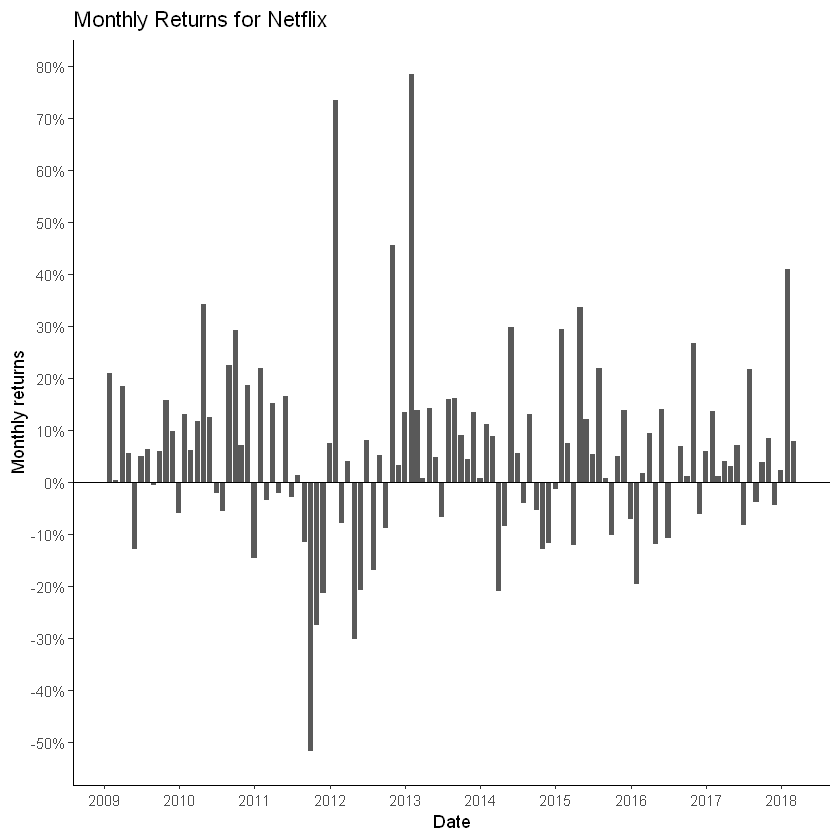

In [11]:
# Charting the monthly returns for Netflix. Using bar charts

netflix_monthly_returns %>%
  ggplot(aes(x = date, y = nflx_returns)) +
  geom_bar(stat = "identity") +
  theme_classic() +
  labs(x = "Date", y = "Monthly returns") +
  ggtitle("Monthly Returns for Netflix") +
  geom_hline(yintercept = 0) +
  scale_y_continuous(breaks = seq(-0.6,0.8,0.1),
                     labels = scales::percent) +
  scale_x_date(date_breaks = "years", date_labels = "%Y")

### Calculating the cumulative returns for the Netflix stock

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other word, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the **cumprod()** function.

In [14]:
netflix_cum_returns <- netflix_daily_returns %>%
  mutate(cr = cumprod(1 + nflx_returns)) %>%      # using the cumprod function
  mutate(cumulative_returns = cr - 1)

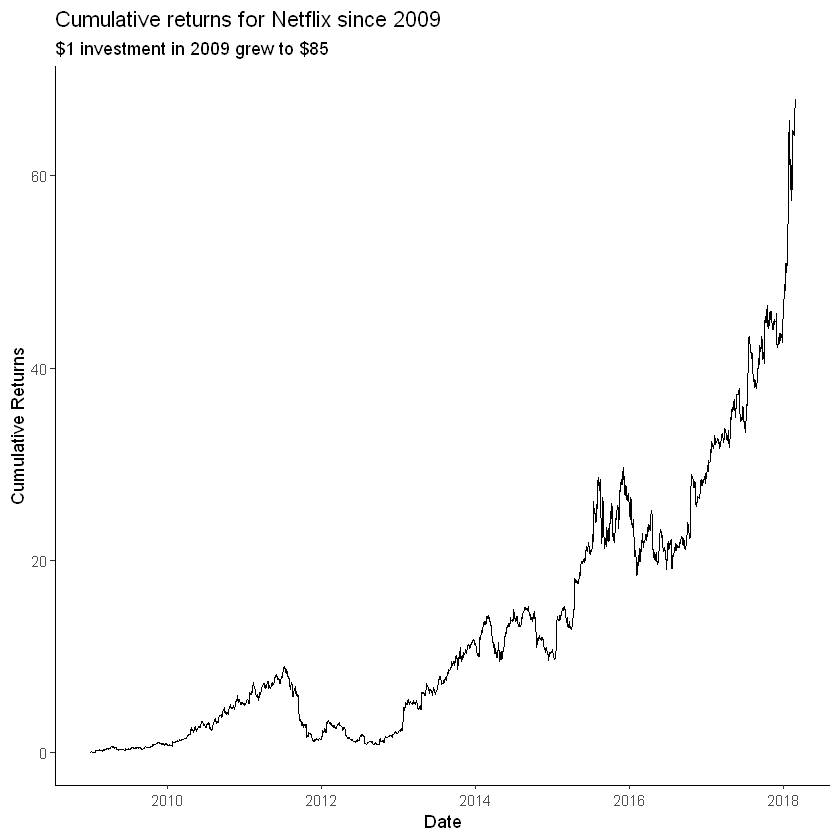

In [15]:
netflix_cum_returns %>%
  ggplot(aes(x = date, y = cumulative_returns)) +
  geom_line() +
  theme_classic() +
  labs(x = "Date", y = "Cumulative Returns") +
  ggtitle("Cumulative returns for Netflix since 2009",
          subtitle = "$1 investment in 2009 grew to $85")

This chart shows the cumulative returns since 2009 for Netflix. With the power of hindsight, one could have made $85 on a $1 investment since 2009. That is quite a remarkable performance. But as we know its easier said then done. During the 10 year or so period there were times when the investment lost 50% of its value during the [Qwickster fiasco](https://www.codingfinance.com/post/2018-04-03-calc-returns/%22https://som.yale.edu/case/2012/netflix-and-qwikster%22). Very few investors can hold onto investments through such periods.

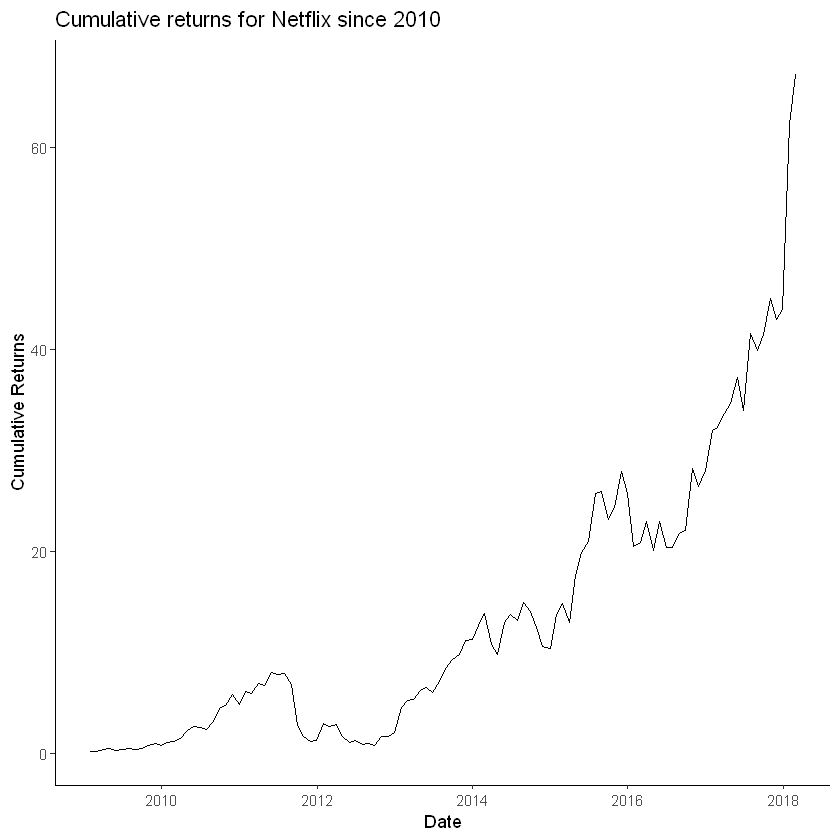

In [16]:
netflix_monthly_returns %>%
  mutate(cr = cumprod(1 + nflx_returns)) %>%
  mutate(cumulative_returns = cr - 1) %>%
  ggplot(aes(x = date, y = cumulative_returns)) +
  geom_line() +
  theme_classic() +
  labs(x = "Date", y = "Cumulative Returns") +
  ggtitle("Cumulative returns for Netflix since 2010")

We can visualize that the monthly returns chart is much more smoother than the daily chart.

## Multiple stocks

### Downloading stock market data for multiple stocks.

In [18]:
# Setting our stock symbols to a variable

tickers <- c("META", "AMZN", "AAPL", "NFLX", "GOOGL") 

# Dowload the stock price data

multpl_stocks <- tq_get(tickers,
                        from = "2013-01-01",
                        to = "2018-03-01",
                        get = "stock.prices")

### Charting the stock prices for multiple stocks

Next we will chart the stock prices for multiple stocks

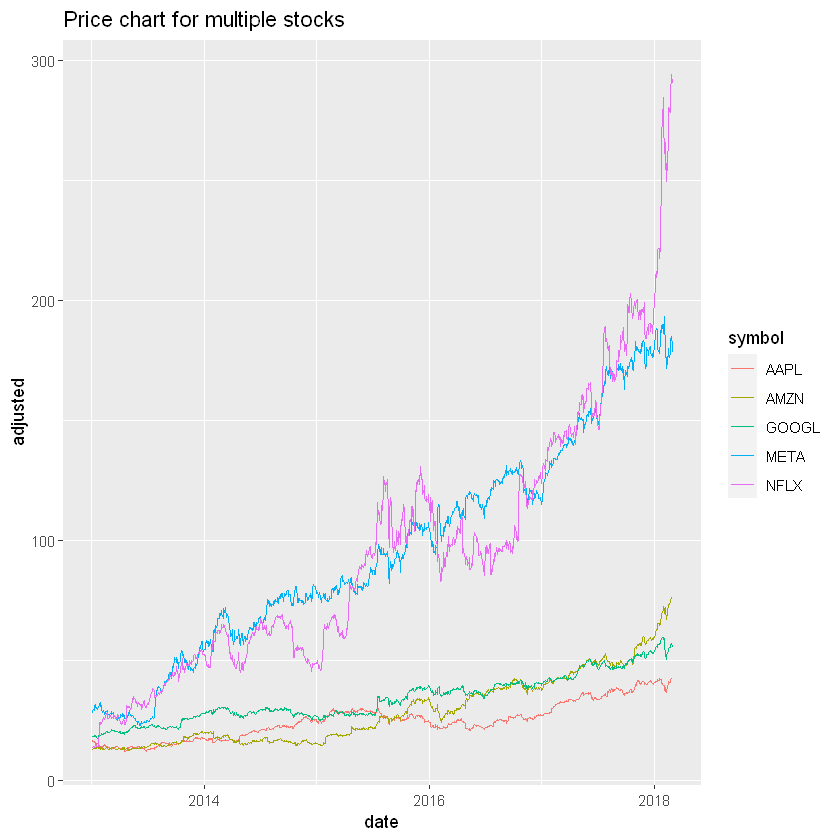

In [19]:
multpl_stocks %>%
  ggplot(aes(x = date, y = adjusted, color = symbol)) +
  geom_line() +
  ggtitle("Price chart for multiple stocks")

This is not the result we expected. Since these stocks have huge price differences (META is under 165 and AMZN is above 1950), their scales are different. We can overcome this problem by plotting stocks on their own individual y scale.

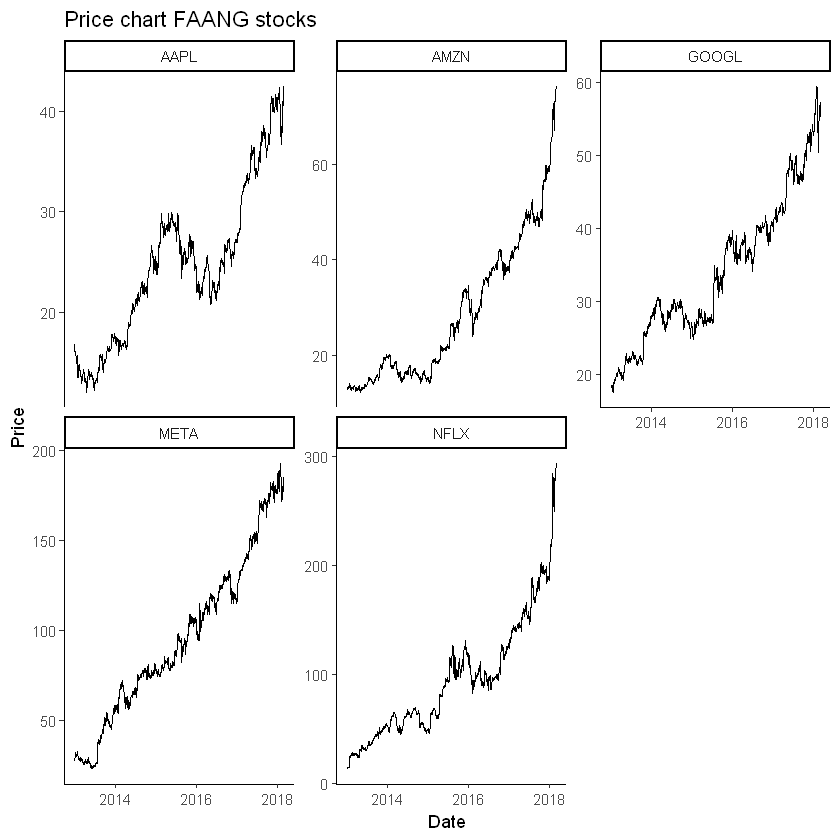

In [20]:
multpl_stocks %>%
  ggplot(aes(x = date, y = adjusted)) +
  geom_line() +
  facet_wrap(~symbol, scales = "free_y") +  # facet_wrap is used to make diff frames
  theme_classic() +       # using a new theme
  labs(x = "Date", y = "Price") +
  ggtitle("Price chart FAANG stocks")

### Calculating the returns for multiple stocks

Calculating the the returns for multiple stocks is just as easy as the single stock. Here were just need to pass an additional argument. We need to use the argumen**t group_by(symbo**l) to calculate the returns for individual stocks.

In [21]:
#Calculating the daily returns for multiple stocks

multpl_stock_daily_returns <- multpl_stocks %>%
  group_by(symbol) %>%                            # We are grouping the stocks by the stock symbol
  tq_transmute(select = adjusted,
               mutate_fun = periodReturn,
               period = 'daily',
               col_rename = 'returns')

#Calculating the monthly returns for multiple stocks

multpl_stock_monthly_returns <- multpl_stocks %>%
  group_by(symbol) %>%                             # We are grouping the stocks by symbol
  tq_transmute(select = adjusted,
               mutate_fun = periodReturn,
               period = 'monthly',
               col_rename = 'returns')

### Charting the returns for multiple stocks

Once we have the returns calculation we can plot the returns on the chart.

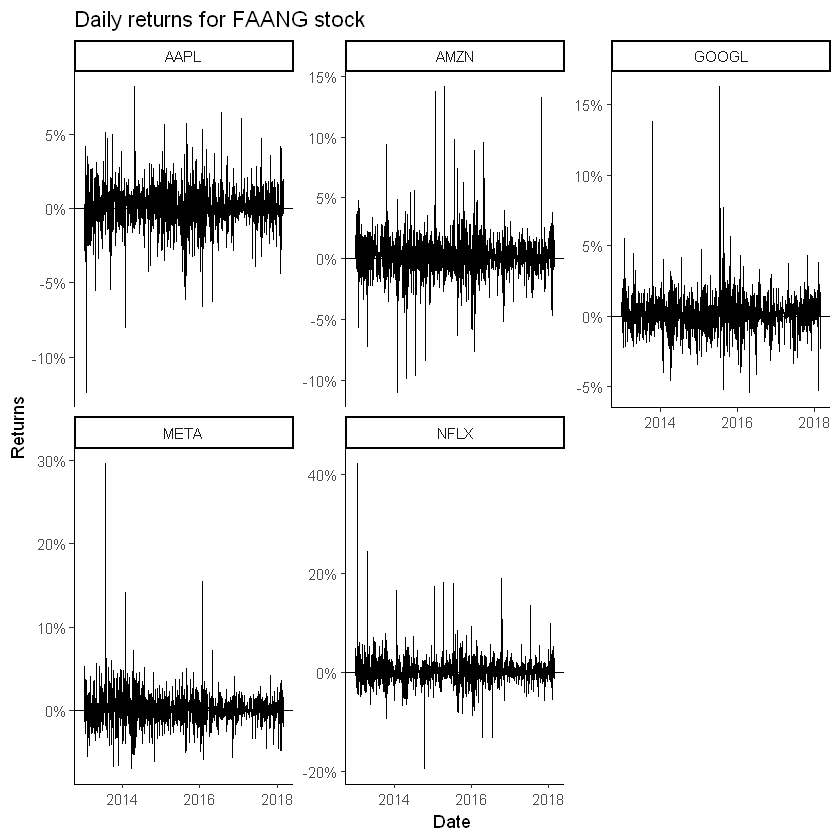

In [27]:
multpl_stock_daily_returns %>%
  ggplot(aes(x = date, y = returns)) +
  geom_line() +
  geom_hline(yintercept = 0) +
  facet_wrap(~symbol, scales = "free_y") +
  scale_y_continuous(labels = scales::percent) +
  ggtitle("Daily returns for FAANG stock") +
  labs(x = "Date", y = "Returns") +
  scale_color_brewer(palette = "Set2",
                     name = "",
                     guide = FALSE) +
  theme_classic()

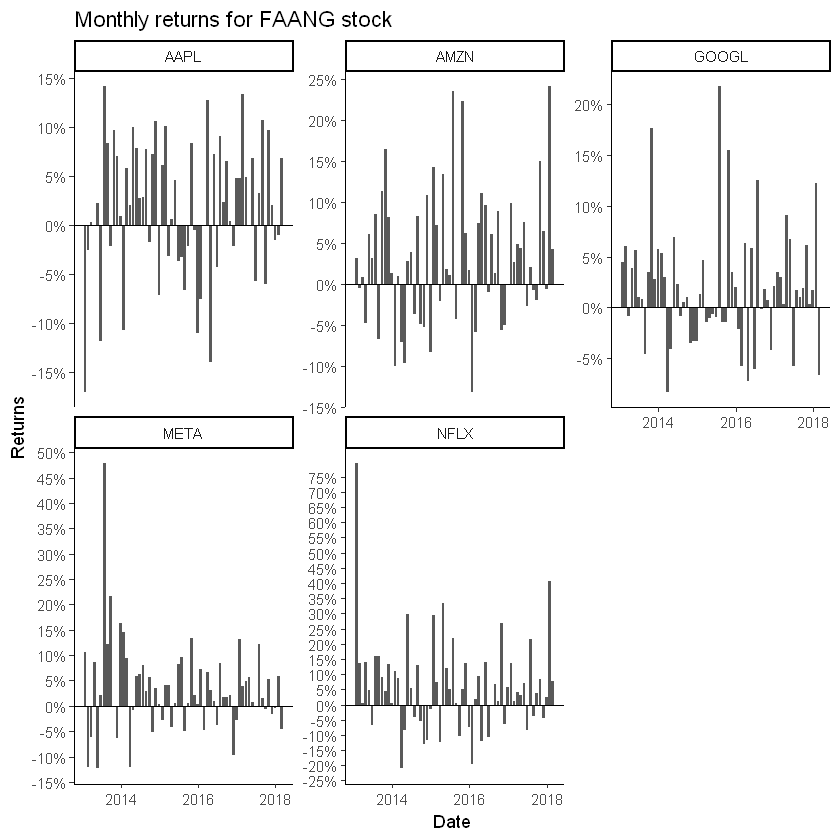

In [28]:
multpl_stock_monthly_returns %>%
  ggplot(aes(x = date, y = returns)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = 0) +
  facet_wrap(~symbol, scales = "free_y") +
  scale_y_continuous(labels = scales::percent,
                     breaks = seq(-0.5,0.75,0.05)) +
  ggtitle("Monthly returns for FAANG stock") +
  labs(x = "Date", y = "Returns") +
  scale_fill_brewer(palette = "Set1",   # We will give them different colors instead of black
                     name = "",
                     guide = FALSE) +
  theme_classic()

Apple is the least volatile of the FAANG stocks and Facebook and Netflix are the most volatile. This is obvious with the kind of business they are in. Apple is a steady business, with stable cash flows. Its products are liked and used by millions people and they have enormous loyalty towards Apple. Netflix and Facebook are also incredible businesses but they are in the high growth phase and any issues (earnings or user growth decline) can affect the stock materially.

### Calculating Cumulative returns for multiple stocks

Often we would like to see which investment produced the best results in the past. To do this we can calculate the cumulative results. Below we compare the investment result for all the FAANG stocks since 2013. Which was the best investment since 2013?

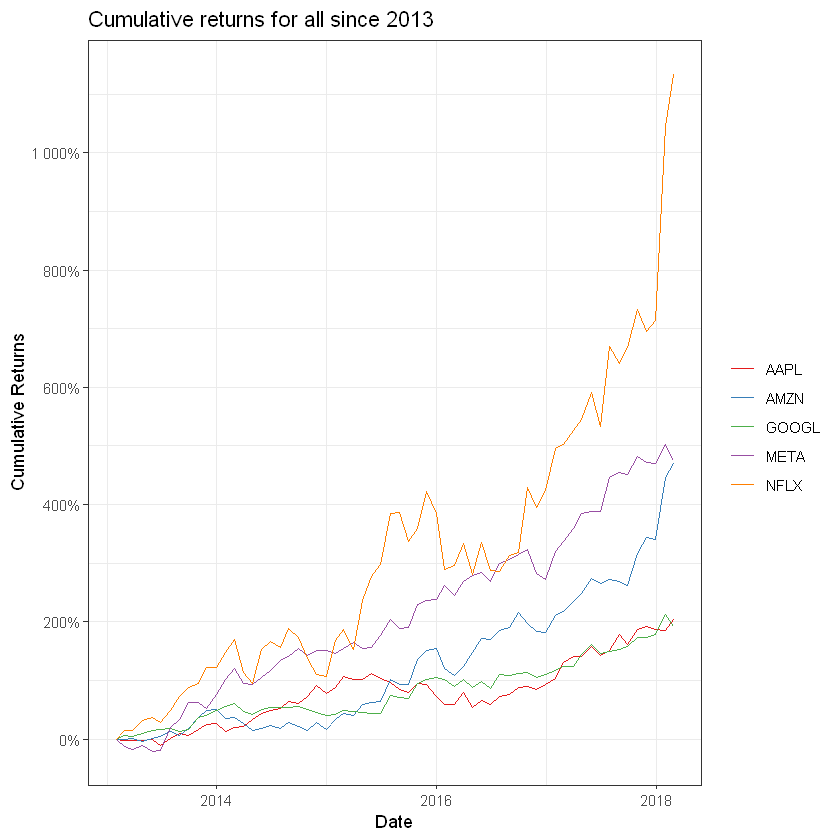

In [30]:
multpl_stock_monthly_returns %>%
  mutate(returns = if_else(date == "2013-01-31", 0, returns)) %>%
  group_by(symbol) %>%  # Need to group multiple stocks
  mutate(cr = cumprod(1 + returns)) %>%
  mutate(cumulative_returns = cr - 1) %>%
  ggplot(aes(x = date, y = cumulative_returns, color = symbol)) +
  geom_line() +
  labs(x = "Date", y = "Cumulative Returns") +
  ggtitle("Cumulative returns for all since 2013") +
  scale_y_continuous(breaks = seq(0,20,2),
                     labels = scales::percent) +
  scale_color_brewer(palette = "Set1",
                     name = "") +
  theme_bw()

Not surprisingly, Netflix had the best returns since 2013. Amazon and Facebook come in distant second and third. The most surprising result is Google. It has severely under performed the other stocks in the FAANG group. Maybe the market participants are worried about its spending on the moon shot projects (Google glass, X Labs, Waymo etc). Whether these projects can produce results is yet to be seen.

A contrarian could argue that given the investments in the future projects, Google is currently undervalued an could be the better investment among the FAANG stocks.

## Statistical Data

### Calculating the Mean, standard deviation for Individual Stock

We already have the daily and monthly returns data for Netflix. Now we we will calculate the daily and monthly mean and standard deviations of the returns. We will use **mean()** and **sd()** functions for our purpose.

In [31]:
# Calculating the mean
nflx_daily_mean_ret <- netflix_daily_returns %>%
  select(nflx_returns) %>%
  .[[1]] %>%
  mean(na.rm = TRUE)

nflx_monthly_mean_ret <- netflix_monthly_returns %>%
  select(nflx_returns) %>%
  .[[1]] %>%
  mean(na.rm = TRUE)

# Calculating the standard deviation

nflx_daily_sd_ret <- netflix_daily_returns %>%
  select(nflx_returns) %>%
  .[[1]] %>%
  sd()

nflx_monthly_sd_ret <- netflix_monthly_returns %>%
  select(nflx_returns) %>%
  .[[1]] %>%
  sd()

nflx_stat <- tibble(period = c("Daily", "Monthly"),
                    mean = c(nflx_daily_mean_ret, nflx_monthly_mean_ret),
                    sd = c(nflx_daily_sd_ret, nflx_monthly_sd_ret))

nflx_stat 

period,mean,sd
<chr>,<dbl>,<dbl>
Daily,0.002395191,0.03367744
Monthly,0.053463548,0.17610581


We can see that Netflix has an average daily returns of 0.2% and 3.3% standard deviation. Its monthly mean returns is 5.2% and 17% standard deviation. This data is for the entire period since 2009. What if we want to calculate the mean and standard deviations for each year. We can calculate this by grouping the Netflix returns data by year and performing our calculations.

In [32]:
netflix_monthly_returns %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarise(Monthly_Mean_Returns = mean(nflx_returns),
            MOnthly_Standard_Deviation = sd(nflx_returns)) 

year,Monthly_Mean_Returns,MOnthly_Standard_Deviation
<dbl>,<dbl>,<dbl>
2009,0.05663904,0.09872655
2010,0.10997618,0.14173958
2011,-0.04921180,0.20884470
2012,0.05622606,0.28871123
2013,0.13693267,0.21646904
2014,0.00247730,0.13996547
2015,0.08268430,0.14755926
2016,0.01376395,0.12596140
2017,0.04008705,0.08149786


We can also plot the result for better understanding.

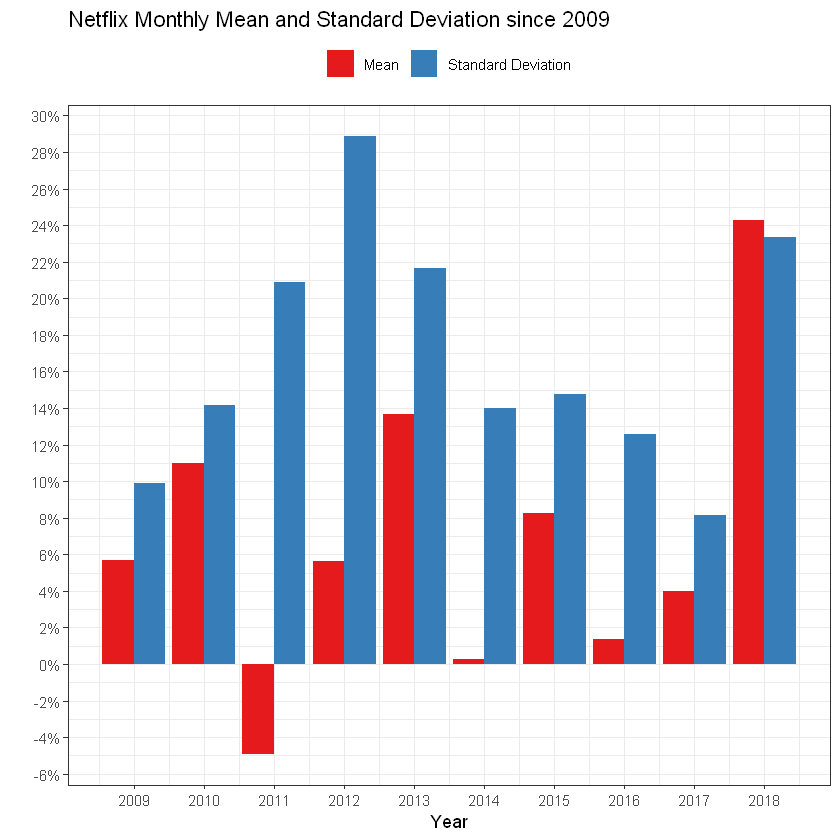

In [35]:
netflix_monthly_returns %>%
  mutate(year = year(date)) %>%
  group_by(year) %>%
  summarise(Mean_Returns = mean(nflx_returns),
            Standard_Deviation = sd(nflx_returns)) %>%
  gather(Mean_Returns, Standard_Deviation, key = statistic, value = value) %>%
  ggplot(aes(x = year, y = value, fill = statistic)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_y_continuous(breaks = seq(-0.1,0.4,0.02),
                     labels = scales::percent) +
  scale_x_continuous(breaks = seq(2009,2018,1)) +
  labs(x = "Year", y = "") +
  theme_bw() +
  theme(legend.position = "top") +
  scale_fill_brewer(palette = "Set1",
                    name = "",
                    labe = c("Mean", "Standard Deviation")) +
  ggtitle("Netflix Monthly Mean and Standard Deviation since 2009")

As we can see, the monthly returns and standard deviations have fluctuated a lot since 2009. In 2011 the average monthly return was -5%. This was the year when Netflix had the Qwickster fiasco. The stock lost about 75% during this year.

### Calculating the Mean, standard deviation for Multiple Stocks

Next we can calculate the mean and standard deviations for multiple stocks.

In [36]:
multpl_stock_daily_returns %>%
  group_by(symbol) %>%
  summarise(mean = mean(returns),
            sd = sd(returns)) 

symbol,mean,sd
<chr>,<dbl>,<dbl>
AAPL,0.0008263433,0.01508237
AMZN,0.0015308889,0.01831935
GOOGL,0.0009547607,0.01397723
META,0.0016243299,0.02024924
NFLX,0.0028168981,0.03004191


In [37]:
multpl_stock_monthly_returns %>%
  group_by(symbol) %>%
  summarise(mean = mean(returns),
            sd = sd(returns)) 

symbol,mean,sd
<chr>,<dbl>,<dbl>
AAPL,0.01744695,0.06975367
AMZN,0.03197221,0.07999649
GOOGL,0.01970216,0.05771493
META,0.03385887,0.08995329
NFLX,0.06143042,0.15697778


Calculating the yearly mean and standard deviation of returns.

In [38]:
multpl_stock_monthly_returns %>%
  mutate(year = year(date)) %>%
  group_by(symbol, year) %>%
  summarise(mean = mean(returns),
            sd = sd(returns))

`summarise()` has grouped output by 'symbol'. You can override using the `.groups` argument.


symbol,year,mean,sd
<chr>,<dbl>,<dbl>,<dbl>
AAPL,2013,0.0075359572,0.08800223
AAPL,2014,0.0308957716,0.06700899
AAPL,2015,-0.0007363275,0.06285947
AAPL,2016,0.0124817102,0.07524013
AAPL,2017,0.0351697507,0.06159871
AAPL,2018,0.0287742492,0.05573506
AMZN,2013,0.0391000924,0.06597820
AMZN,2014,-0.0183957009,0.07062540
AMZN,2015,0.0706066891,0.09307553


We can also plot this statistical data.

`summarise()` has grouped output by 'symbol'. You can override using the `.groups` argument.


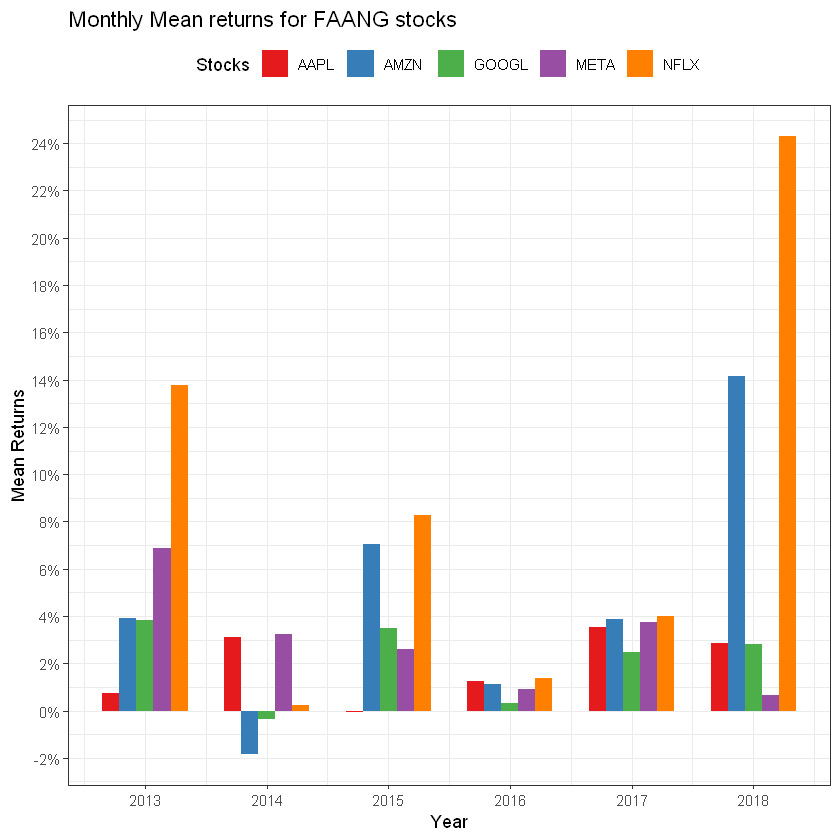

In [39]:
multpl_stock_monthly_returns %>%
  mutate(year = year(date)) %>%
  group_by(symbol, year) %>%
  summarise(mean = mean(returns),
            sd = sd(returns)) %>%
  ggplot(aes(x = year, y = mean, fill = symbol)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  scale_y_continuous(breaks = seq(-0.1,0.4,0.02),
                     labels = scales::percent) +
  scale_x_continuous(breaks = seq(2009,2018,1)) +
  labs(x = "Year", y = "Mean Returns") +
  theme_bw() +
  theme(legend.position = "top") +
  scale_fill_brewer(palette = "Set1",
                    name = "Stocks") +
  ggtitle("Monthly Mean returns for FAANG stocks")

`summarise()` has grouped output by 'symbol'. You can override using the `.groups` argument.


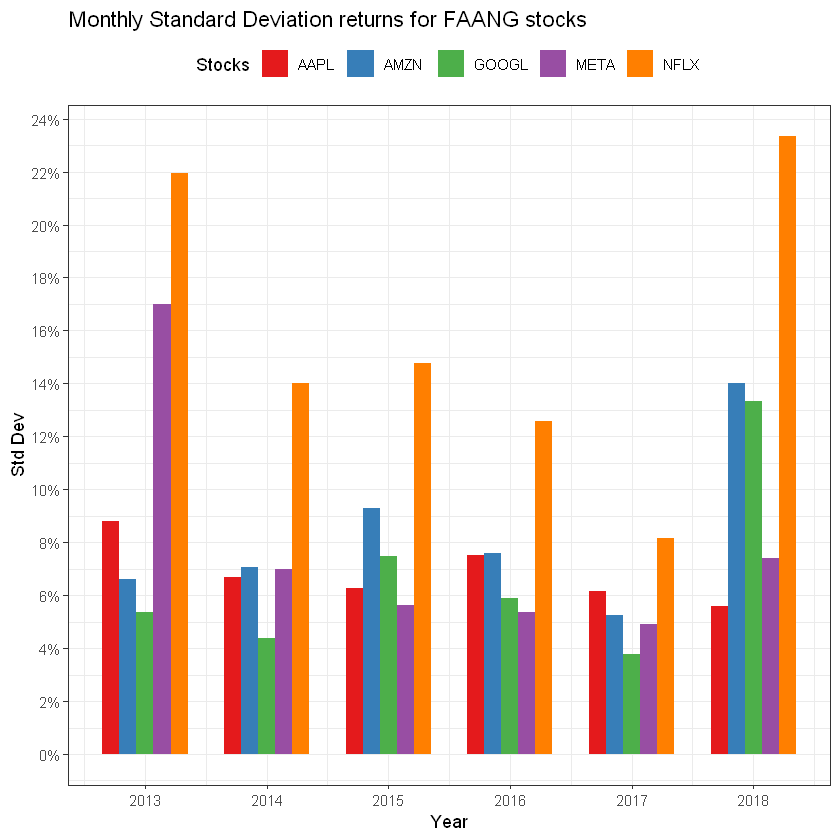

In [40]:
multpl_stock_monthly_returns %>%
  mutate(year = year(date)) %>%
  group_by(symbol, year) %>%
  summarise(mean = mean(returns),
            sd = sd(returns)) %>%
  ggplot(aes(x = year, y = sd, fill = symbol)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  scale_y_continuous(breaks = seq(-0.1,0.4,0.02),
                     labels = scales::percent) +
  scale_x_continuous(breaks = seq(2009,2018,1)) +
  labs(x = "Year", y = "Std Dev") +
  theme_bw() +
  theme(legend.position = "top") +
  scale_fill_brewer(palette = "Set1",
                    name = "Stocks") +
  ggtitle("Monthly Standard Deviation returns for FAANG stocks")

### Calculating covariance and correlation for Multiple Stocks

Another important statistical calculation is the correlation and covariance of the stocks. For calculating these stats, we need to modify our data. We will need to spread the returns in such a way that they are in the wide format. Then we will convert it to an xts object.

The Covariance table.

In [41]:
# Calculating the Covariance
multpl_stock_monthly_returns %>%
  spread(symbol, value = returns) %>%
  tk_xts(silent = TRUE) %>%
  cov()

,AAPL,AMZN,GOOGL,META,NFLX
AAPL,0.0048655746,0.001548199,0.0007199244,0.0008412405,-0.000331742
AMZN,0.0015481987,0.006399439,0.0028806557,0.0014185613,0.004754893
GOOGL,0.0007199244,0.002880656,0.0033310137,0.0013974285,0.003595316
META,0.0008412405,0.001418561,0.0013974285,0.0080915944,0.003458228
NFLX,-0.0003317420,0.004754893,0.0035953155,0.0034582282,0.024642024


The correlation table

In [42]:
# Calculating the correlation

multpl_stock_monthly_returns %>%
  spread(symbol, value = returns) %>%
  tk_xts(silent = TRUE) %>%
  cor() 

,AAPL,AMZN,GOOGL,META,NFLX
AAPL,1.00000000,0.2774525,0.1788264,0.1340714,-0.03029669
AMZN,0.27745251,1.0000000,0.6239247,0.1971334,0.37864445
GOOGL,0.17882639,0.6239247,1.0000000,0.2691686,0.39683559
META,0.13407137,0.1971334,0.2691686,1.0000000,0.24490542
NFLX,-0.03029669,0.3786444,0.3968356,0.2449054,1.00000000


We can plot this using a **corrplot()** package to chart the correlation matrix chart.

In [43]:
library(corrplot)

corrplot 0.92 loaded



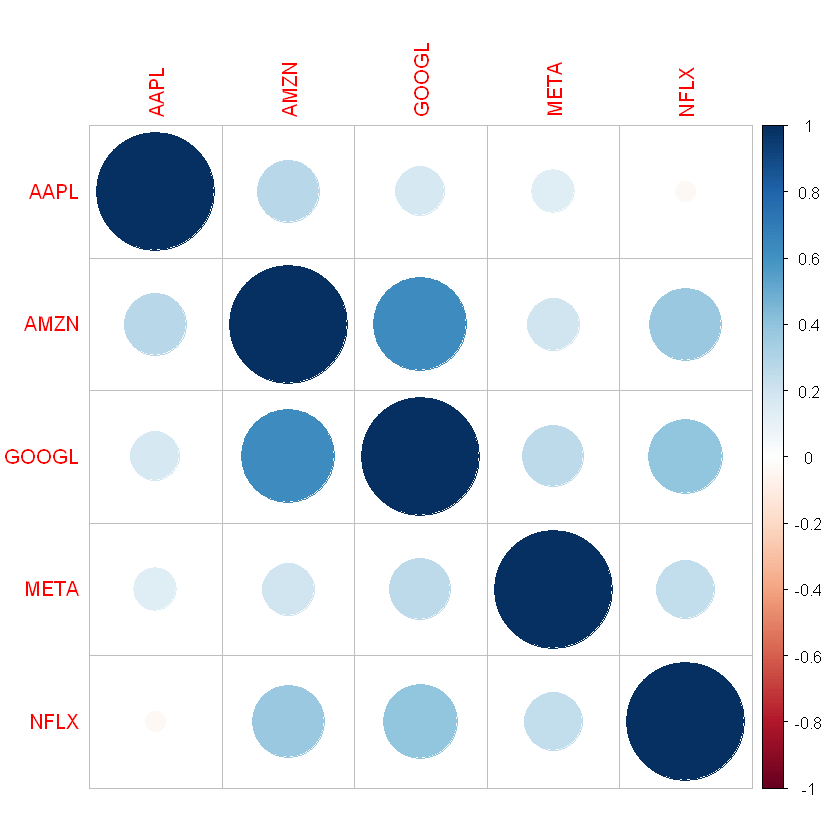

In [44]:
multpl_stock_monthly_returns %>%
  spread(symbol, value = returns) %>%
  tk_xts(silent = TRUE) %>%
  cor() %>%
  corrplot()

## Summary

We did a lot in this port.

- Download prices
- Calculate returns
- Calculate mean and standard deviations
- Calculate the correlation and covariance of stocks